# Figure 2 - ABCDEF



In [1]:
from libraries import *
from parameters import *

In [2]:
%load_ext rpy2.ipython

In [3]:
os.getcwd()
os.chdir(projectDir)

In [4]:
adata = sc.read("outputs/anndata/adata-hash-features_singlets_05242020.h5ad")

/home/eraslab1/miniconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/eraslab1/miniconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata.X.shape

(519535, 13811)

In [6]:
adata.obs

barcode_rank  channel  empty_drops_FDR  \
AAACCCAAGCGTTCCG-1-E3-1         4441.0        1              0.0   
AAACCCAAGGAGATAG-1-E3-1        15850.0        1              0.0   
AAACCCAAGTCCGCGT-1-E3-1         9651.5        1              0.0   
AAACCCACAAAGGCTG-1-E3-1         1517.0        1              0.0   
AAACCCACAGCACAGA-1-E3-1         6897.0        1              0.0   
...                                ...      ...              ...   
TTTGTTGCAGGACATG-1-E4-24       21270.0       24              0.0   
TTTGTTGCATCGATGT-1-E4-24       19398.5       24              0.0   
TTTGTTGGTGTCACAT-1-E4-24       20227.5       24              0.0   
TTTGTTGGTTCAATCG-1-E4-24        3513.5       24              0.0   
TTTGTTGTCCATTGTT-1-E4-24       16076.5       24              0.0   

                          log10_n_genes  log10_n_umis   mt_frac  n_counts  \
AAACCCAAGCGTTCCG-1-E3-1        3.273696      3.771955  0.064243    5915.0   
AAACCCAAGGAGATAG-1-E3-1        3.149835      3.538071  0.043163    3452.0   
AAACCCAAGTCCGCGT-1-E3-1        3.234264      3.648165  0.071493    4448.0   
AAACCCACAAAGGCTG-1-E3-1        3.382017      3.887898  0.074822    7725.0   
AAACCCACAGCACAGA-1-E3-1        3.259355      3.704150  0.056719    5060.0   
...                                 ...           ...       ...       ...   
TTTGTTGCAGGACATG-1-E4-24       3.060320      3.423246  0.040377    2650.0   
TTTGTTGCATCGATGT-1-E4-24       3.229938      3.638190  0.039107    4347.0   
TTTGTTGGTGTCACAT-1-E4-24       3.197832      3.561340  0.051620    3642.0   
TTTGTTGGTTCAATCG-1-E4-24       3.524136      4.080410  0.060578   12034.0   
TTTGTTGTCCATTGTT-1-E4-24       3.334253      3.786893  0.075302    6122.0   

                          n_genes   n_umis  neg_log10_empty_drops_FDR  ...  \
AAACCCAAGCGTTCCG-1-E3-1      1878   5915.0                        4.0  ...   
AAACCCAAGGAGATAG-1-E3-1      1412   3452.0                        4.0  ...   
AAACCCAAGTCCGCGT-1-E3-1      1715   4448.0                        4.0  ...   
AAACCCACAAAGGCTG-1-E3-1      2410   7725.0                        4.0  ...   
AAACCCACAGCACAGA-1-E3-1      1817   5060.0                        4.0  ...   
...                           ...      ...                        ...  ...   
TTTGTTGCAGGACATG-1-E4-24     1149   2650.0                        4.0  ...   
TTTGTTGCATCGATGT-1-E4-24     1698   4347.0                        4.0  ...   
TTTGTTGGTGTCACAT-1-E4-24     1577   3642.0                        4.0  ...   
TTTGTTGGTTCAATCG-1-E4-24     3343  12034.0                        4.0  ...   
TTTGTTGTCCATTGTT-1-E4-24     2159   6122.0                        4.0  ...   

                          ONE_NONGENE_SITE_325 ONE_NONGENE_SITE_326  \
AAACCCAAGCGTTCCG-1-E3-1                      0                    0   
AAACCCAAGGAGATAG-1-E3-1                      0                    0   
AAACCCAAGTCCGCGT-1-E3-1                      0                    0   
AAACCCACAAAGGCTG-1-E3-1                      0                    0   
AAACCCACAGCACAGA-1-E3-1                      0                    0   
...                                        ...                  ...   
TTTGTTGCAGGACATG-1-E4-24                     0                    0   
TTTGTTGCATCGATGT-1-E4-24                     0                    0   
TTTGTTGGTGTCACAT-1-E4-24                     0                    0   
TTTGTTGGTTCAATCG-1-E4-24                     0                    0   
TTTGTTGTCCATTGTT-1-E4-24                     0                    0   

                         ONE_NONGENE_SITE_327 ONE_NONGENE_SITE_328  \
AAACCCAAGCGTTCCG-1-E3-1                     0                    0   
AAACCCAAGGAGATAG-1-E3-1                     0                    0   
AAACCCAAGTCCGCGT-1-E3-1                     0                    0   
AAACCCACAAAGGCTG-1-E3-1                     0                    0   
AAACCCACAGCACAGA-1-E3-1                     0                    0   
...                                       ...                  ...   
TTTG

In [7]:
adata.obs["subcellType"] = "DC2"
adata.obs.loc[adata.obs["leiden"] == "8","subcellType"] = "DC1"
adata.obs.loc[adata.obs["leiden"] == "5","subcellType"] = "mReg"
adata.obs.loc[adata.obs["leiden"] == "3","subcellType"] = "Mac"

In [8]:
k = adata.obs["subcellType"].value_counts()

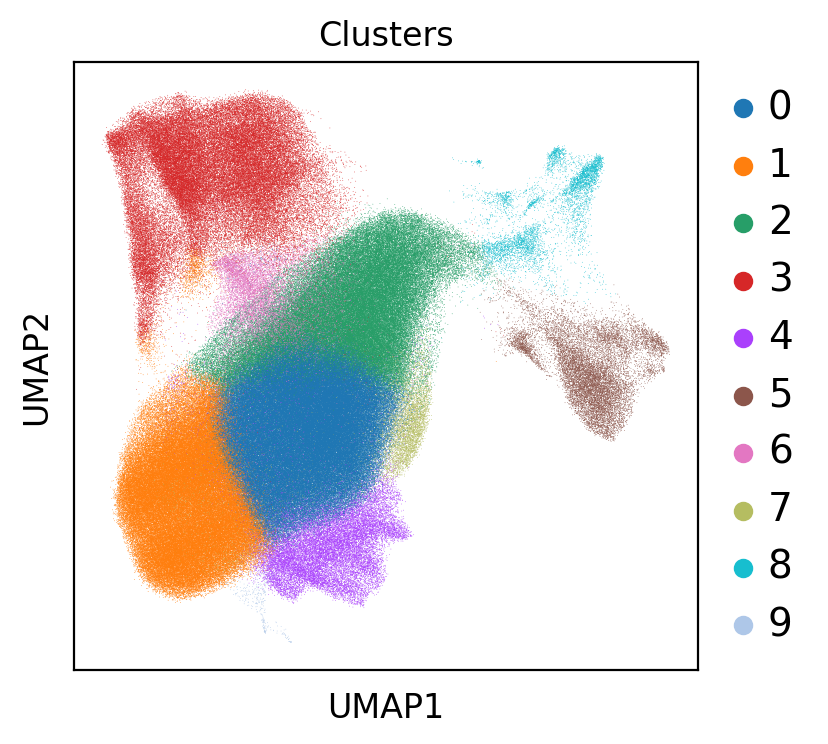

In [10]:
f, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adata, color='leiden', 
           legend_fontoutline=3, legend_fontsize=14, 
           legend_fontweight='normal', title='Clusters', 
           ax=ax, show=False, size=0.3);

In [12]:
f, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adata, color='leiden',  save="Figure_1C.pdf", legend_fontoutline=3, legend_fontsize=14, 
           legend_fontweight='normal', title='Clusters', ax=ax, show=False, size=0.3);

In [13]:
sc.tl.dendrogram(adata, groupby='leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


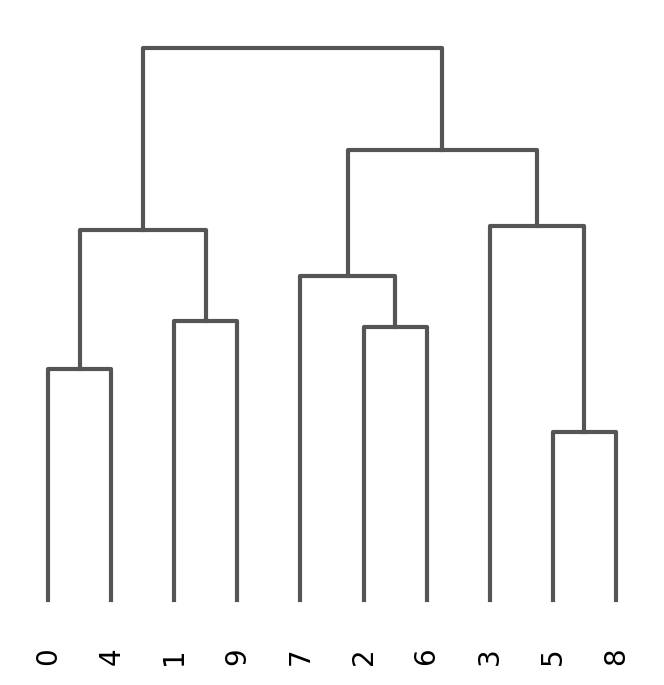

<AxesSubplot:>

In [14]:
sc.pl.dendrogram(adata, groupby='leiden', save="SupFig_1F.pdf")

In [15]:
sc.tl.rank_genes_groups(adata, groupby="leiden", n_genes=2000, method="t-test_overestim_var", use_raw =False)

ranking genes


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/eras

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:25:33)


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [16]:
markerGenes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

In [17]:
adata.uns['rank_genes_groups']['names']

rec.array([('Ctsl', 'Chil3', 'Mgl2', 'Stmn1', 'Sqstm1', 'Ccl22', 'Ifit1', 'Cbln1', 'H2-Eb1', 'S100a8'),
           ('Ctsb', 'Car4', 'Ccl17', 'Pclaf', 'Esd', 'Ccr7', 'Rsad2', 'Gm2694', 'H2-Ab1', 'Lcn2'),
           ('Mmp12', 'Fabp4', 'Cd52', 'Top2a', 'Npy', 'Cst3', 'Isg15', 'Clec4n', 'Cst3', 'S100a9'),
           ...,
           ('Gys1', 'Cryz', 'Hist2h3c2', 'Efr3a', 'Ndrg4', 'Gimap5', 'Scamp5', 'Foxn2', 'Cherp', 'Xpo1'),
           ('Adcy4', 'Bckdk', 'Bfar', 'Cep135', 'Fuca1', 'Pop4', 'Aes', 'Per1', 'Ptpn4', 'Card11'),
           ('Plxdc1', 'Rbm14', 'Ankrd9', 'Mtmr2', 'Peak1', 'Ddx17', 'Mppe1', 'Dennd4b', 'Foxo1', 'Lins1')],
          dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O'), ('9', 'O')])

In [18]:
markerGenes = markerGenes.iloc[0:8,:]

In [19]:
markerGenes

0      1        2       3          4        5       6         7  \
0   Ctsl  Chil3     Mgl2   Stmn1     Sqstm1    Ccl22   Ifit1     Cbln1   
1   Ctsb   Car4    Ccl17   Pclaf        Esd     Ccr7   Rsad2    Gm2694   
2  Mmp12  Fabp4     Cd52   Top2a        Npy     Cst3   Isg15    Clec4n   
3   Ctss  Fabp5     Cd74   Hmgb2      Gpnmb    Fscn1   Slfn5     Mmp12   
4   Lyz2    Cd9    Crip1   Mki67      H2-D1     Ccl5     Mx1       Lpl   
5  Gpnmb   Ctsd    H2-Aa   Birc5  Hist1h2bc  Tmem123  Ifi204  AA467197   
6   Igf1   Plek  H2-DMb1   H2afz    Tnfaip2     Pkib   Ifit2     Inhba   
7  Mmp14   Fth1      Fn1  Tuba1b       Rhob    Il4i1  Rnf213      Mtpn   

        8       9  
0  H2-Eb1  S100a8  
1  H2-Ab1    Lcn2  
2    Cst3  S100a9  
3   H2-Aa  Gm5483  
4    Cd74   Ly6c2  
5    Aif1  Wfdc21  
6   Napsa   Thbs1  
7  Ifitm1      Hp

In [20]:
markerGenes = markerGenes.values.flatten(order='F')

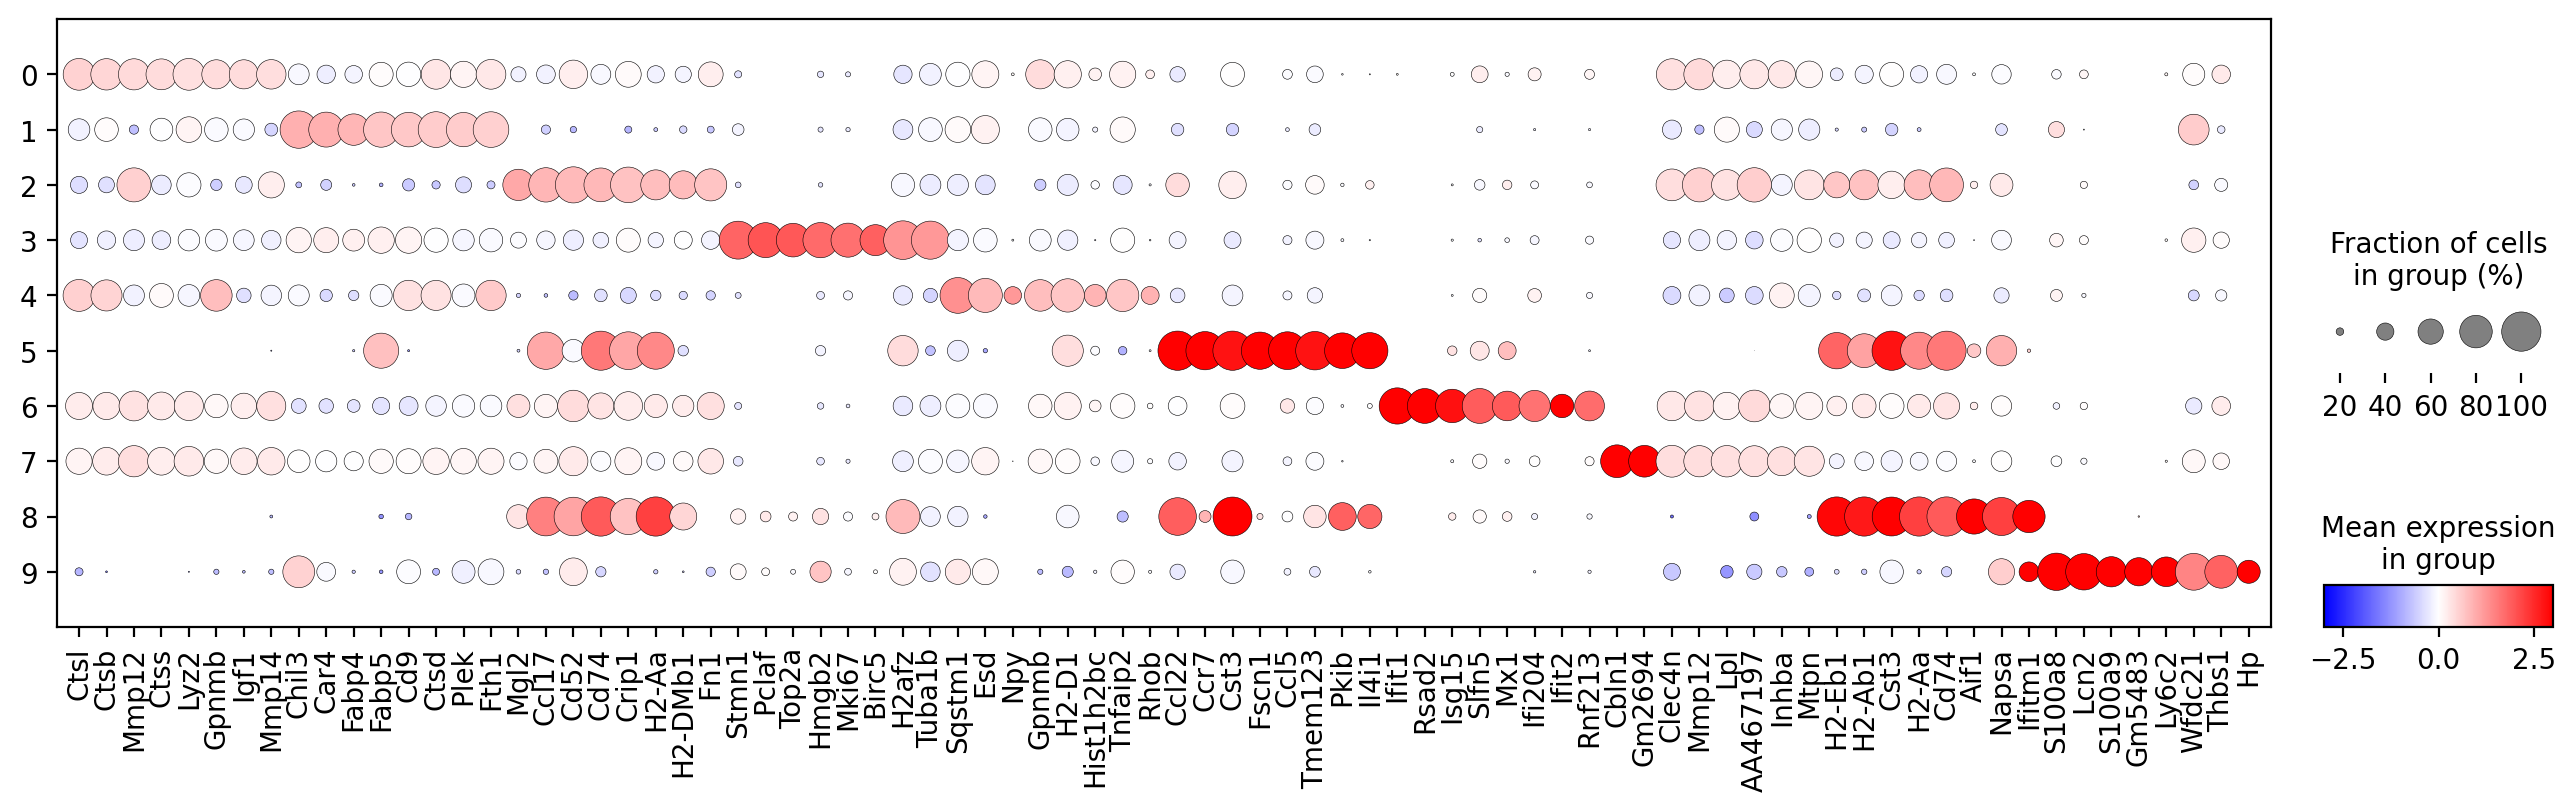

In [21]:
sc.pl.dotplot(adata, markerGenes, groupby='leiden', cmap='bwr', figsize=(16,4), 
              vmin=-3, vmax=3, use_raw=False,  dot_min=0.1, dot_max=1, save="SupFig_1G.pdf")

In [ ]:
#markerGenes = np.unique(markerGenes.values.flatten())

In [ ]:
# sc.pl.matrixplot(adata, var_names = markerGenes, groupby='leiden', dendrogram=True,
#                       use_raw=False, vmin=-3, vmax=3,cmap='bwr',  swap_axes=False, figsize=(16,4))

In [ ]:
# sc.pl.rank_genes_groups_matrixplot(adata, n_genes=10, standard_scale='var', cmap='Blues')

In [22]:
gene_list_url = 'https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt'

cell_cycle_genes = [str(x.strip(), 'utf-8').capitalize() for x in urlopen(gene_list_url)] # capitalize = shame


s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]


sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:01:24)
computing score 'G2M_score'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    683 total control genes are used. (0:01:08)
-->     'phase', cell cycle phase (adata.obs)


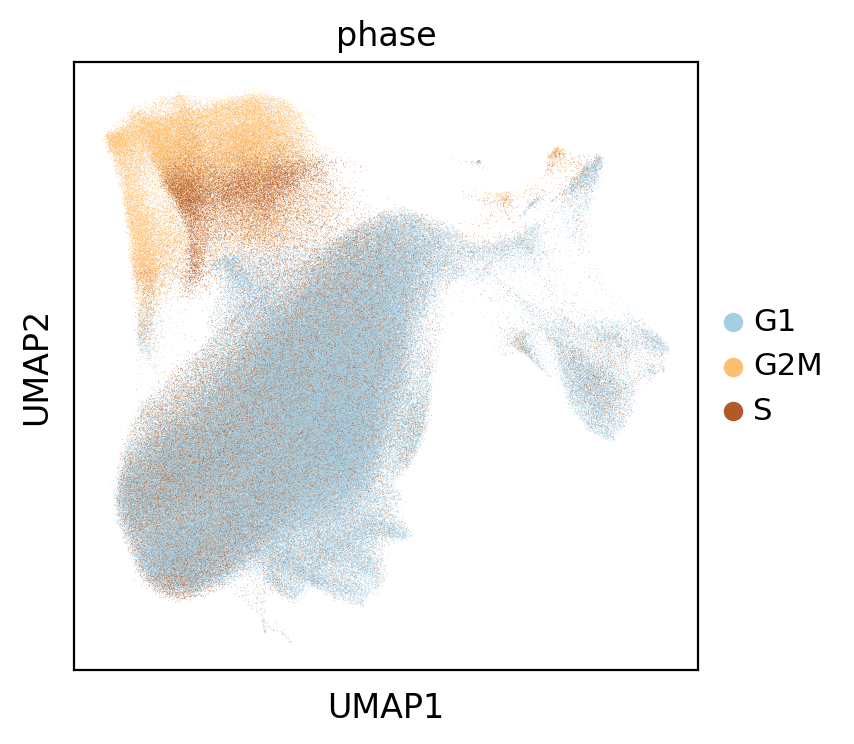

In [23]:
sc.pl.umap(adata, color='phase', palette = "Paired", save="Figure_1G.pdf" )

<AxesSubplot:ylabel='n_genes'>

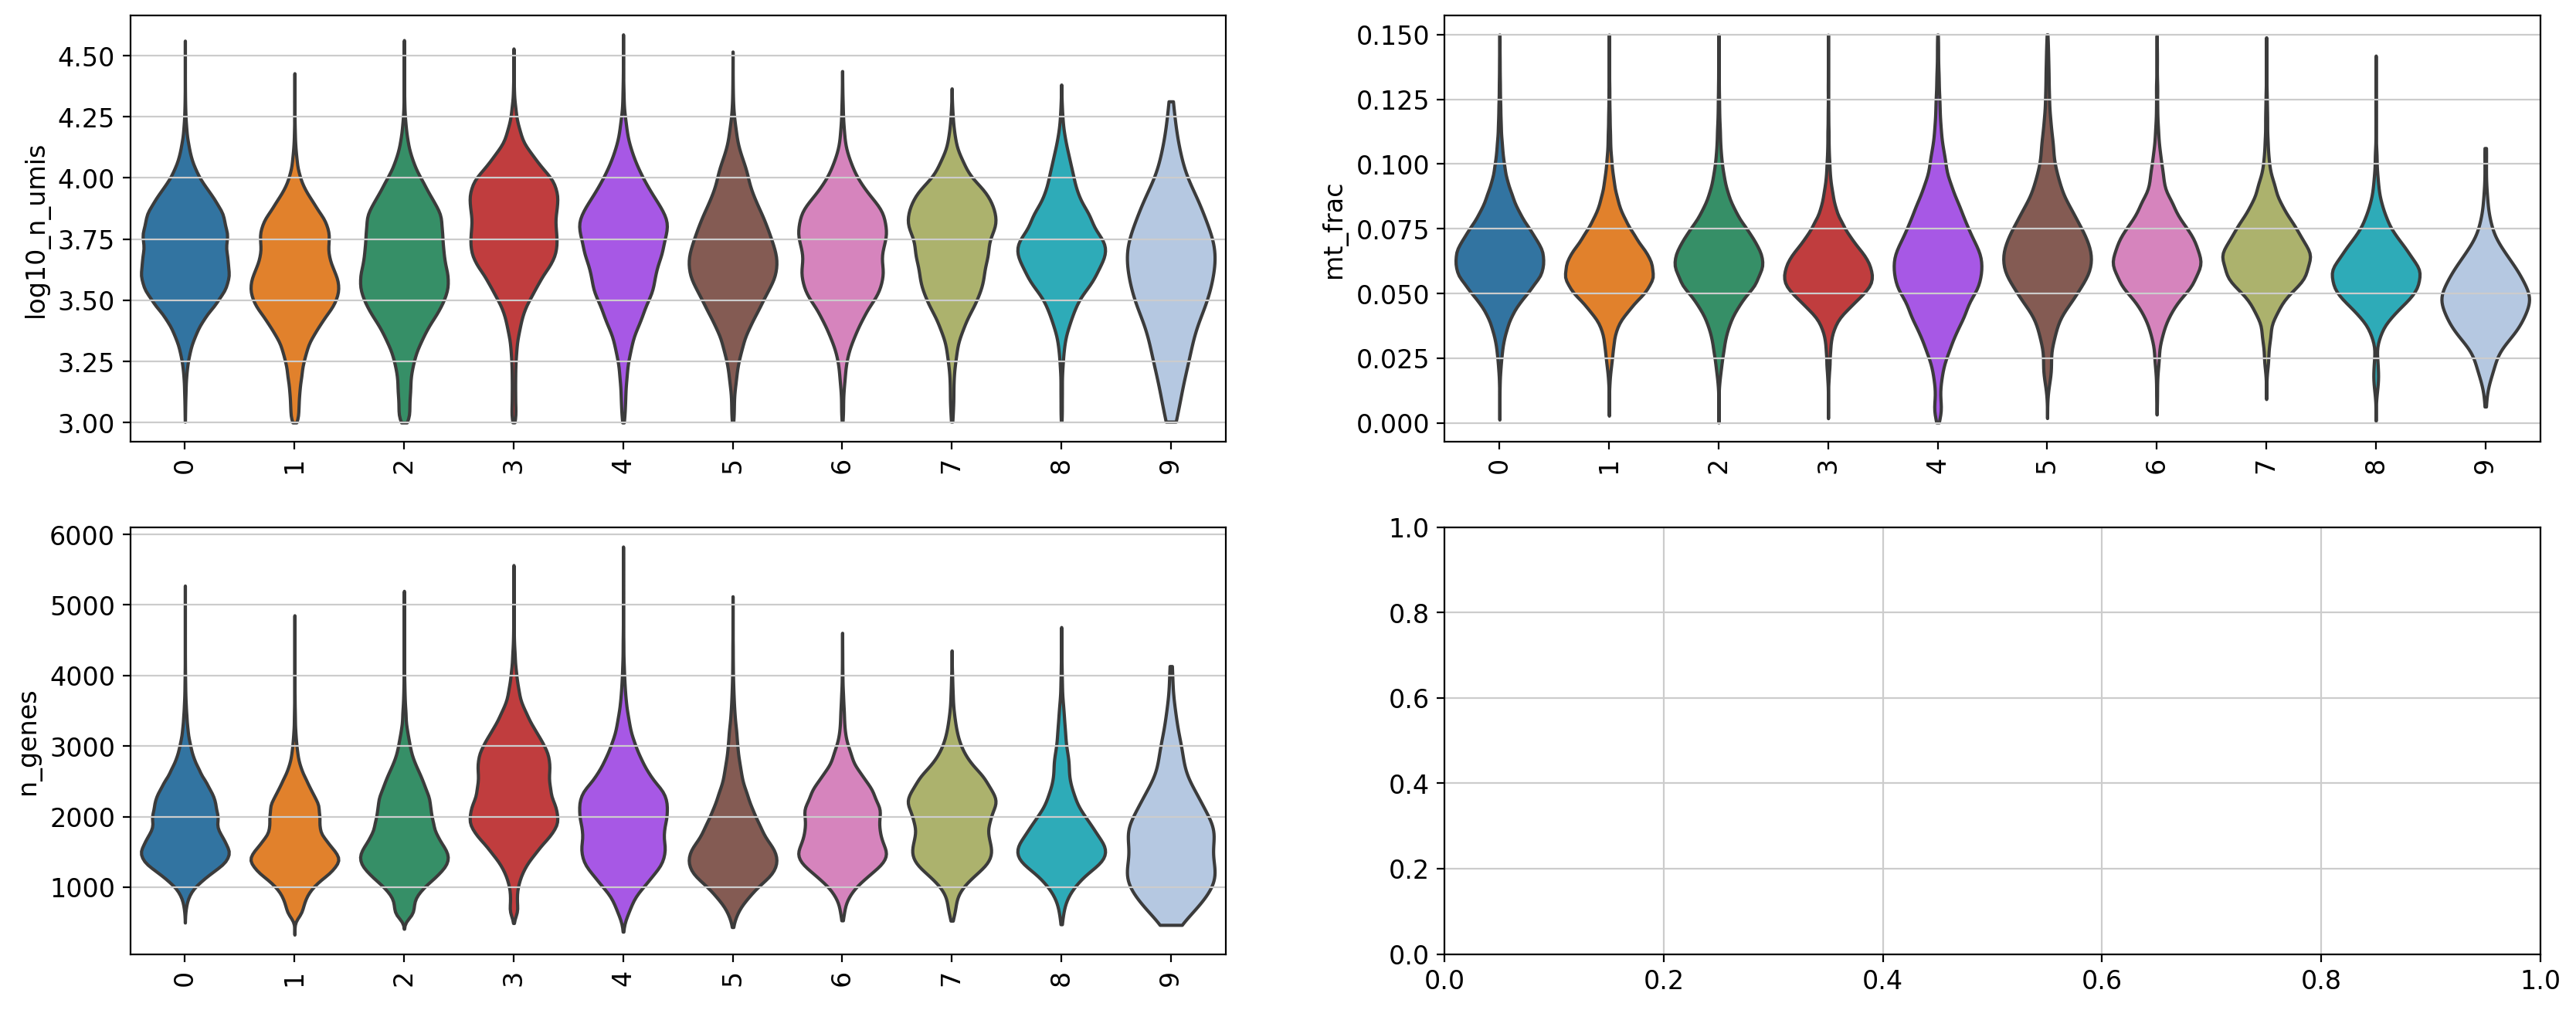

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 8))
sc.pl.violin(adata, keys='log10_n_umis', groupby='leiden', rotation=90,   ax=ax[0][0],show=False, stripplot=False)
sc.pl.violin(adata, keys='mt_frac', groupby='leiden', rotation=90,   ax=ax[0][1],show=False, stripplot=False)
sc.pl.violin(adata, keys='n_genes', groupby='leiden', rotation=90,   ax=ax[1][0],show=False, stripplot=False)


In [27]:
dcGenes = pd.read_csv('./PositiveControls/DC_cellstate_genes.csv')

In [28]:
dc1Genes = dcGenes["DC1 genes"].unique()
sc.tl.score_genes(adata=adata, gene_list=dc1Genes, score_name="DC1")

computing score 'DC1'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC1', score of gene set (adata.obs).
    1192 total control genes are used. (0:01:22)


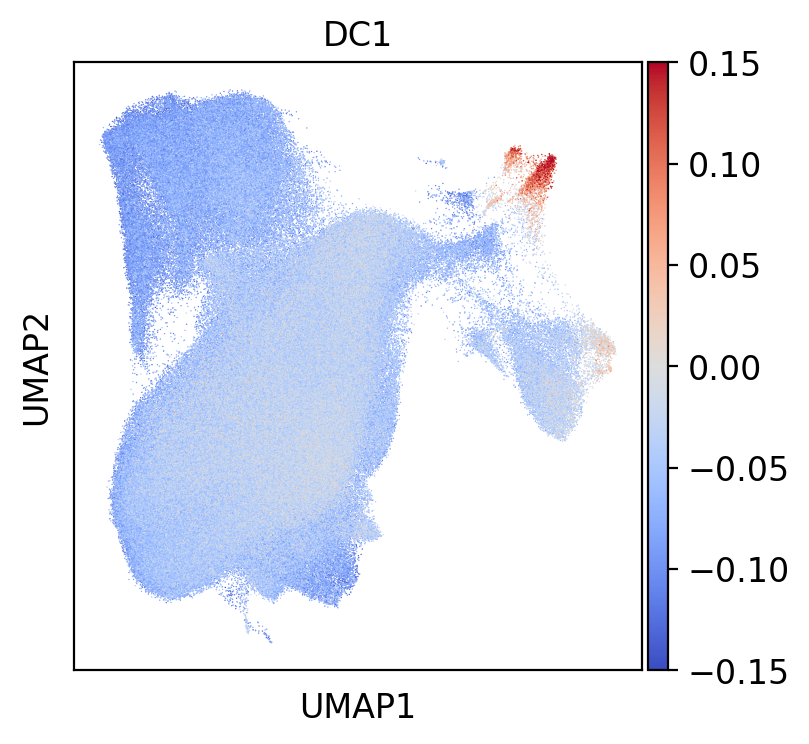

In [29]:
sc.pl.umap(adata, color="DC1", size=1, color_map="coolwarm", save="Figure_1F.pdf", vmax=0.15, vmin=-0.15)


In [ ]:
#sc.pl.violin(adata, "DC1", groupby='leiden')

In [30]:
dc2Genes = dcGenes["DC2 genes"].unique()
sc.tl.score_genes(adata=adata, gene_list=dc2Genes, score_name="DC2")

computing score 'DC2'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC2', score of gene set (adata.obs).
    1179 total control genes are used. (0:01:29)


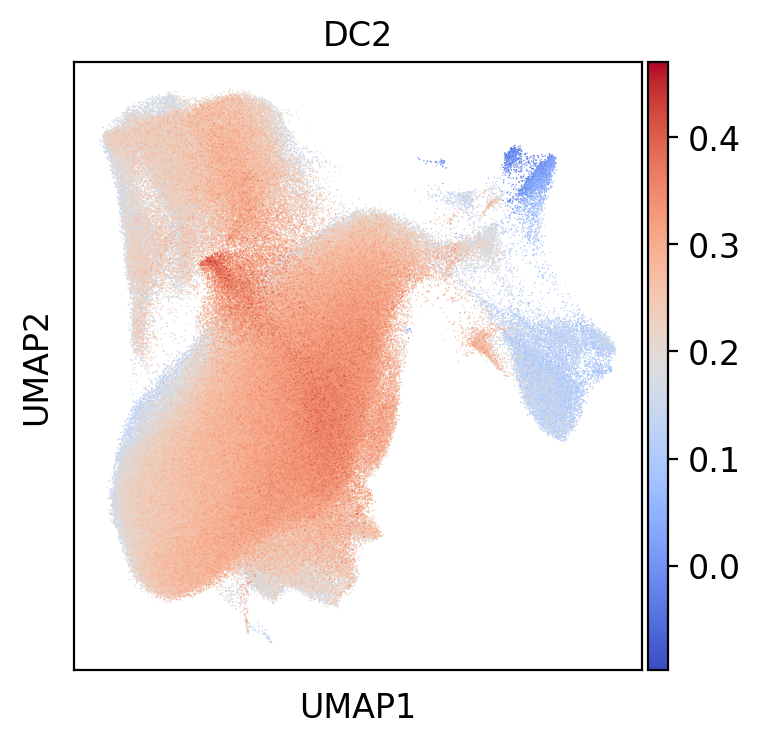

In [31]:
sc.pl.umap(adata, color="DC2", size=1, color_map="coolwarm", save="Figure_1D.pdf")


In [32]:
mregGenes = dcGenes["mregDC genes"].unique()
sc.tl.score_genes(adata=adata, gene_list=mregGenes, score_name="mreg")


computing score 'mreg'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'mreg', score of gene set (adata.obs).
    1170 total control genes are used. (0:01:28)


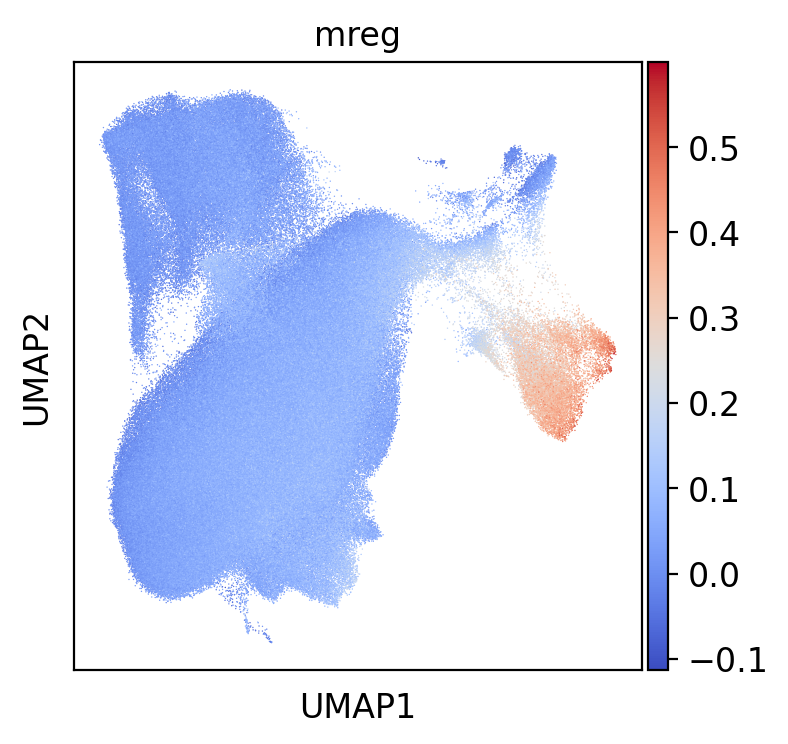

In [33]:
sc.pl.umap(adata, color="mreg", size=1, color_map="coolwarm", save="Figure_1E.pdf")


In [34]:
macGenes = dcGenes["Macrophage genes"].unique()
sc.tl.score_genes(adata=adata, gene_list=macGenes, score_name="Mac")


computing score 'Mac'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'Mac', score of gene set (adata.obs).
    1126 total control genes are used. (0:01:26)


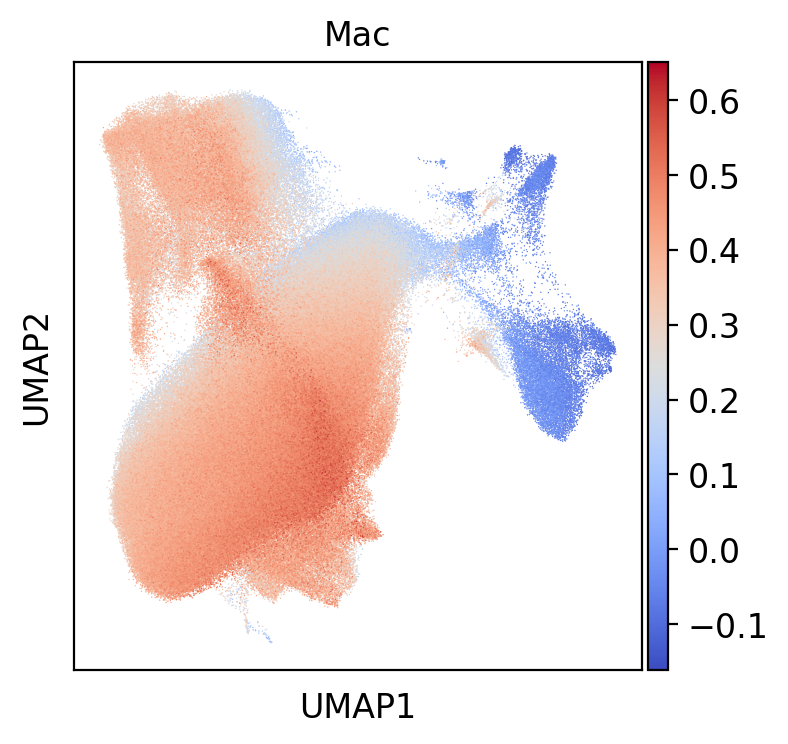

In [35]:
sc.pl.umap(adata, color="Mac", size=1, color_map="coolwarm", save="SupFig_1Y.pdf")


In [38]:
allDCgenes = np.concatenate((dc1Genes, dc2Genes, mregGenes))
sc.tl.score_genes(adata=adata, gene_list=allDCgenes, score_name="DCSig")

computing score 'DCSig'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DCSig', score of gene set (adata.obs).
    1122 total control genes are used. (0:01:27)


In [39]:
adata.obs

barcode_rank  channel  empty_drops_FDR  \
AAACCCAAGCGTTCCG-1-E3-1         4441.0        1              0.0   
AAACCCAAGGAGATAG-1-E3-1        15850.0        1              0.0   
AAACCCAAGTCCGCGT-1-E3-1         9651.5        1              0.0   
AAACCCACAAAGGCTG-1-E3-1         1517.0        1              0.0   
AAACCCACAGCACAGA-1-E3-1         6897.0        1              0.0   
...                                ...      ...              ...   
TTTGTTGCAGGACATG-1-E4-24       21270.0       24              0.0   
TTTGTTGCATCGATGT-1-E4-24       19398.5       24              0.0   
TTTGTTGGTGTCACAT-1-E4-24       20227.5       24              0.0   
TTTGTTGGTTCAATCG-1-E4-24        3513.5       24              0.0   
TTTGTTGTCCATTGTT-1-E4-24       16076.5       24              0.0   

                          log10_n_genes  log10_n_umis   mt_frac  n_counts  \
AAACCCAAGCGTTCCG-1-E3-1        3.273696      3.771955  0.064243    5915.0   
AAACCCAAGGAGATAG-1-E3-1        3.149835      3.538071  0.043163    3452.0   
AAACCCAAGTCCGCGT-1-E3-1        3.234264      3.648165  0.071493    4448.0   
AAACCCACAAAGGCTG-1-E3-1        3.382017      3.887898  0.074822    7725.0   
AAACCCACAGCACAGA-1-E3-1        3.259355      3.704150  0.056719    5060.0   
...                                 ...           ...       ...       ...   
TTTGTTGCAGGACATG-1-E4-24       3.060320      3.423246  0.040377    2650.0   
TTTGTTGCATCGATGT-1-E4-24       3.229938      3.638190  0.039107    4347.0   
TTTGTTGGTGTCACAT-1-E4-24       3.197832      3.561340  0.051620    3642.0   
TTTGTTGGTTCAATCG-1-E4-24       3.524136      4.080410  0.060578   12034.0   
TTTGTTGTCCATTGTT-1-E4-24       3.334253      3.786893  0.075302    6122.0   

                          n_genes   n_umis  neg_log10_empty_drops_FDR  ...  \
AAACCCAAGCGTTCCG-1-E3-1      1878   5915.0                        4.0  ...   
AAACCCAAGGAGATAG-1-E3-1      1412   3452.0                        4.0  ...   
AAACCCAAGTCCGCGT-1-E3-1      1715   4448.0                        4.0  ...   
AAACCCACAAAGGCTG-1-E3-1      2410   7725.0                        4.0  ...   
AAACCCACAGCACAGA-1-E3-1      1817   5060.0                        4.0  ...   
...                           ...      ...                        ...  ...   
TTTGTTGCAGGACATG-1-E4-24     1149   2650.0                        4.0  ...   
TTTGTTGCATCGATGT-1-E4-24     1698   4347.0                        4.0  ...   
TTTGTTGGTGTCACAT-1-E4-24     1577   3642.0                        4.0  ...   
TTTGTTGGTTCAATCG-1-E4-24     3343  12034.0                        4.0  ...   
TTTGTTGTCCATTGTT-1-E4-24     2159   6122.0                        4.0  ...   

                          leiden   S_score G2M_score phase subcellType  \
AAACCCAAGCGTTCCG-1-E3-1        0 -0.019452 -0.112811    G1         DC2   
AAACCCAAGGAGATAG-1-E3-1        6 -0.078038 -0.117238    G1         DC2   
AAACCCAAGTCCGCGT-1-E3-1        2 -0.096479 -0.084858    G1         DC2   
AAACCCACAAAGGCTG-1-E3-1        5 -0.027709 -0.110653    G1        mReg   
AAACCCACAGCACAGA-1-E3-1        0 -0.024170 -0.087319    G1         DC2   
...                          ...       ...       ...   ...         ...   
TTTGTTGCAGGACATG-1-E4-24       0  0.038620 -0.146436     S         DC2   
TTTGTTGCATCGATGT-1-E4-24       0 -0.031727 -0.208770    G1         DC2   
TTTGTTGGTGTCACAT-1-E4-24       4 -0.053941 -0.122413    G1         DC2   
TTTGTTGGTTCAATCG-1-E4-24       3  0.266599  0.459743   G2M         Mac   
TTTGTTGTCCATTGTT-1-E4-24       2 -0.037861 -0.166237    G1         DC2   

                               DC1       DC2      mreg       Mac     DCSig  
AAACCCAAGCGTTCCG-1-E3-1  -0.118002  0.237407 -0.002091  0.428250  0.073229  
AAACCCAAGGAGATAG-1-E3-1  -0.072813  0.305983  0.102390  0.186845  0.149731  
AAACCCAAGTCCGCGT-1-E3-1  -0.014944  0.272885  0.051074  0.242972  0.126521  
AAACCCACAAAGGCTG-1-E3-1  -0.072334  0.250127  0.189643  0.236144  0.154114  
AAACCCACAGCACAGA-1-E3-1  -0.101848  0.298272  0.042525  0.429944  0.11352

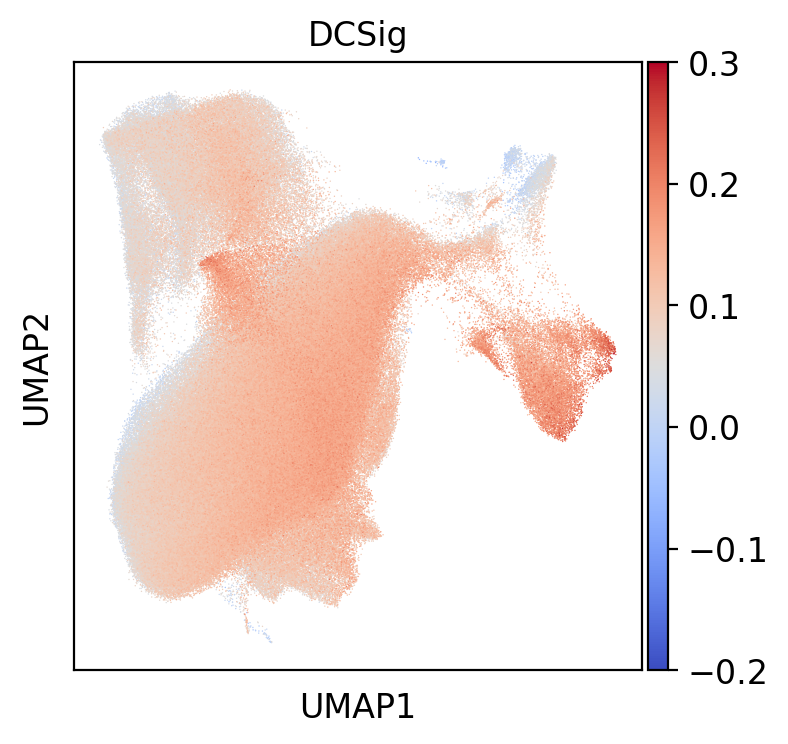

In [40]:
sc.pl.umap(adata, color="DCSig", size=1, color_map="coolwarm", 
           vmin=-0.2, vmax=0.3, save="SupFig_1X.pdf")

In [41]:
adata.obs["DCSig_zscore"] = scipy.stats.zscore(adata.obs["DCSig"])
adata.obs["Mac_zscore"] = scipy.stats.zscore(adata.obs["Mac"])

In [42]:
adata.obs["MACoverDC"] = adata.obs["Mac_zscore"] - adata.obs["DCSig_zscore"]

In [ ]:
sc.pl.umap(adata, color="MACoverDC", size=1, color_map="PiYG", vmin=-5, vmax=5, save="Figure_2F.pdf")


In [45]:
adata.obs["MACoverDC"].describe()


count    5.195350e+05
mean    -1.201658e-16
std      1.319457e+00
min     -1.092468e+01
25%     -5.135760e-01
50%      1.868816e-01
75%      8.071734e-01
max      3.573418e+00
Name: MACoverDC, dtype: float64